# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
from datetime import date


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city) 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
City not found. Skipping...
Processing Record 2 of Set 1 | acarau
Processing Record 3 of Set 1 | mili
City not found. Skipping...
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | adamstown
City not found. Skipping...
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | gamba
City not found. Skipping...
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | oranjemund
City not found. Skipping...
Processing Record 13 of Set 1 | pahrump
Processing Record 14 of Set 1 | suva
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | fuvahmulah
City not found. Skipping...
Processin

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          419
Lat           419
Lng           419
Max Temp      419
Humidity      419
Cloudiness    419
Wind Speed    419
Country       419
Date          419
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,acarau,-2.8856,-40.1200,85.17,69,90,9.62,BR,1684420297
1,puerto natales,-51.7236,-72.4875,37.85,87,40,17.27,CL,1684420297
2,keflavik,64.0049,-22.5624,51.71,100,100,20.71,IS,1684420298
3,whitehorse,60.7161,-135.0538,43.57,52,0,5.75,CA,1684420298
4,punta arenas,-53.1500,-70.9167,39.31,87,75,18.41,CL,1684420298


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv( "output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv( "output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,85.17,69,90,9.62,BR,1684420297
1,puerto natales,-51.7236,-72.4875,37.85,87,40,17.27,CL,1684420297
2,keflavik,64.0049,-22.5624,51.71,100,100,20.71,IS,1684420298
3,whitehorse,60.7161,-135.0538,43.57,52,0,5.75,CA,1684420298
4,punta arenas,-53.1500,-70.9167,39.31,87,75,18.41,CL,1684420298


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

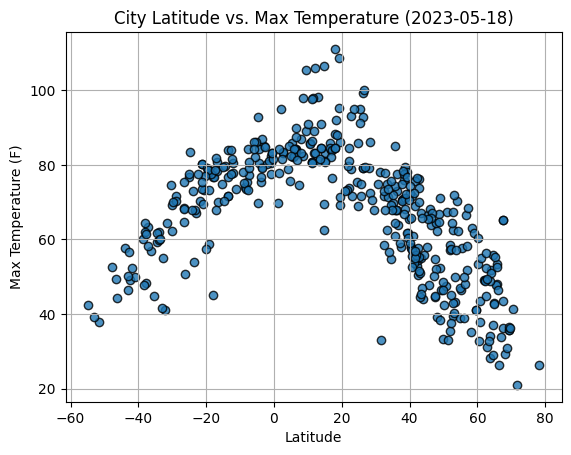

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

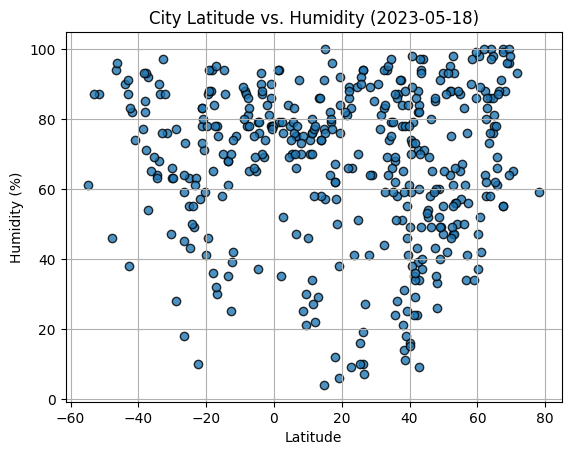

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig( "output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

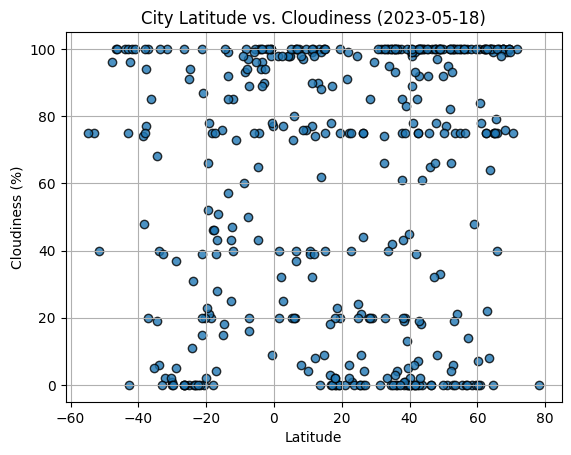

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig( "output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

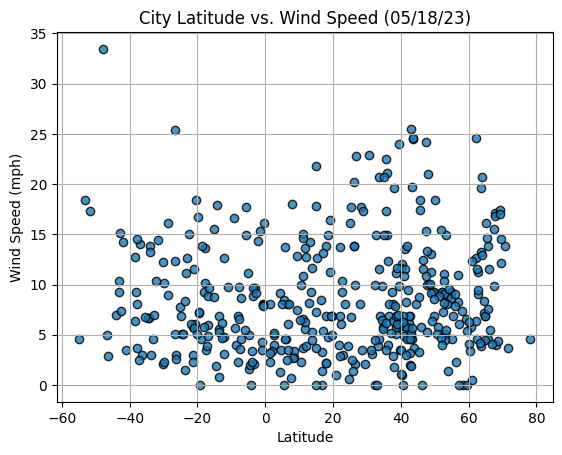

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig( "output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots

def calculate_median(x_values):
  return x_values.median()

def calculate_minimum(y_values):
  return y_values.min()


def linear_regression_plots(x_values, y_values, x_label, y_label, hemisphere):
    current_date = date.today().strftime("%Y-%m-%d")
    # Perform linear regression and obtain relevant statistics
    (slope, intercept, correlation, p_value, standard_error) = linregress(x_values, y_values)

    # Print the rounded correlation value
    print(f'The correlation coefficient is {round(correlation, 2)}')

    # Create the equation of the regression line
    equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

    # Calculate the predicted y-values based on the regression line
    y_regression = (slope * x_values) + intercept

    # Set up the plot
    plt.title(f'{x_label} vs {y_label} on {current_date} in the {hemisphere} hemisphere')
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    plt.grid()

    # Plot the scatter points
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, y_regression, color='limegreen')

    # Determine the position to annotate the equation on the plot
    annotate_x = calculate_median(x_values)
    annotate_y = (calculate_minimum(y_values)) + 10

    # Annotate the equation on the plot in red color
    plt.annotate(equation, (annotate_x, annotate_y), color='red')


In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]
northern_hemi_df = northern_hemi_df.copy()  
northern_hemi_df["Date"] = pd.to_datetime(northern_hemi_df['Date'], unit='s')



# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,keflavik,64.0049,-22.5624,51.71,100,100,20.71,IS,2023-05-18 14:31:38
3,whitehorse,60.7161,-135.0538,43.57,52,0,5.75,CA,2023-05-18 14:31:38
6,bilibino,68.0546,166.4372,29.30,88,76,4.00,RU,2023-05-18 14:31:39
7,pahrump,36.2083,-115.9839,77.45,28,4,4.00,US,2023-05-18 14:31:39
9,jamestown,42.0970,-79.2353,53.02,43,0,5.75,US,2023-05-18 14:29:39


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df = southern_hemi_df.copy()  
southern_hemi_df["Date"] = pd.to_datetime(southern_hemi_df['Date'], unit='s')

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,85.17,69,90,9.62,BR,2023-05-18 14:31:37
1,puerto natales,-51.7236,-72.4875,37.85,87,40,17.27,CL,2023-05-18 14:31:37
4,punta arenas,-53.1500,-70.9167,39.31,87,75,18.41,CL,2023-05-18 14:31:38
5,port elizabeth,-33.9180,25.5701,62.10,90,40,13.80,ZA,2023-05-18 14:31:38
8,suva,-18.1416,178.4415,78.28,94,75,9.22,FJ,2023-05-18 14:31:39


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient is -0.83


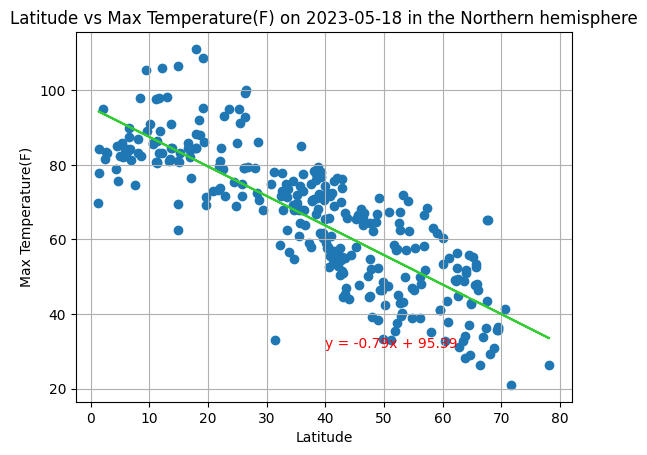

In [71]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature(F)', 'Northern')


The correlation coefficient is 0.83


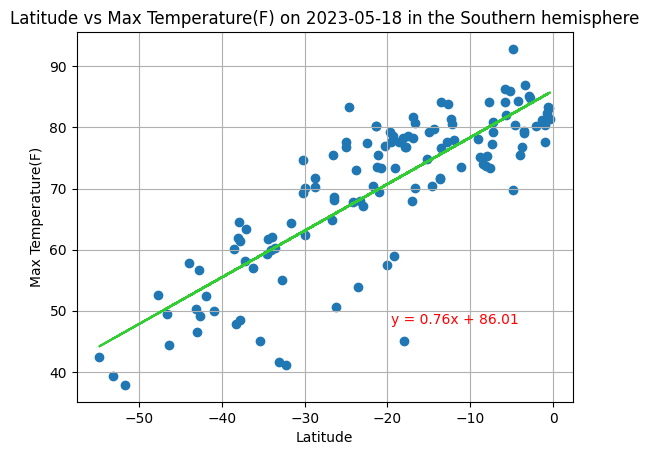

In [72]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature(F)', 'Southern')


**Discussion about the linear relationship:** In the Northern Hemisphere, a robust negative correlation coefficient of -0.83 has been observed, signifying a strong relationship between latitude and maximum temperature. This implies that as one travels farther away from the equator (latitude 0) towards the north, there is a substantial decrease in the maximum temperature experienced in Northern cities. Therefore, Northern cities located at higher latitudes generally exhibit lower maximum temperatures, displaying a distinct pattern.

Conversely, within the Southern Hemisphere, an equally strong positive correlation coefficient of 0.83 has been discovered between latitude and maximum temperature. This correlation reveals that as individuals journey further south from the equator, the maximum temperature encountered in Southern cities progressively increases. Hence, Southern cities situated at lower latitudes typically experience higher maximum temperatures, illustrating a noticeable trend.

These findings demonstrate the influential role of latitude in determining maximum temperature variations between the hemispheres. While the Northern Hemisphere showcases a decrease in maximum temperature as latitude increases, the Southern Hemisphere displays an increase in maximum temperature as latitude decreases. It is crucial to consider these contrasting patterns when assessing and comparing temperature trends across different hemispheres and latitudes.

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient is 0.1


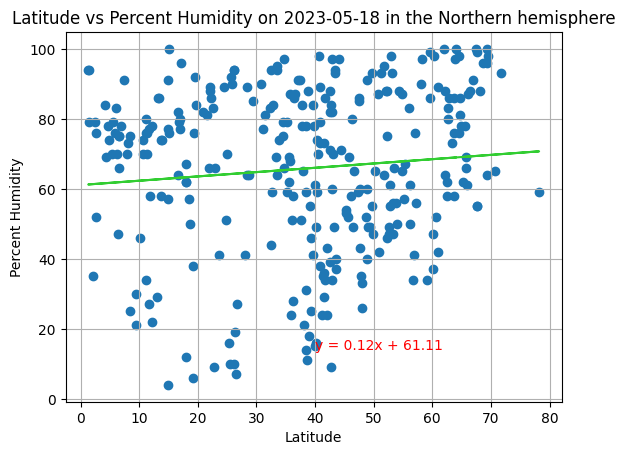

In [73]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Percent Humidity', 'Northern')


The correlation coefficient is 0.01


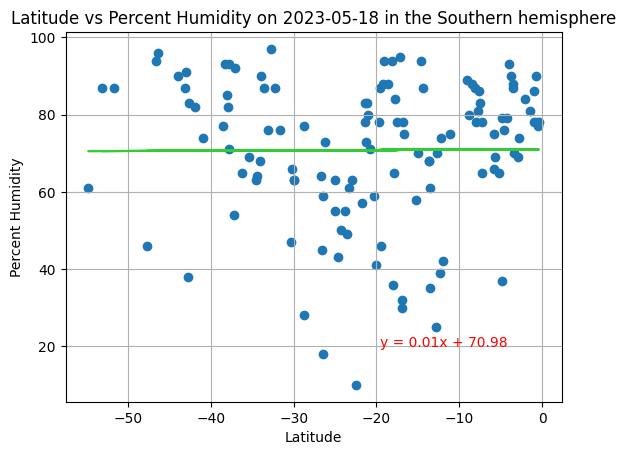

In [74]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Percent Humidity', 'Southern')


**Discussion about the linear relationship:** In the Northern Hemisphere, the analysis reveals a very weak, positive correlation coefficient of 0.1 between humidity (%) and latitude. This suggests that there exists a subtle association between these variables. However, it is important to note that the correlation coefficient indicates a minimal degree of correlation, implying that latitude has limited influence on humidity levels in Northern cities.

Similarly, in the Southern Hemisphere, the analysis indicates an extremely weak, positive correlation coefficient of 0.01 between latitude and percent humidity. This finding further reinforces the notion that latitude has a negligible impact on humidity levels in Southern cities. The correlation coefficient indicates that the relationship between these variables is virtually insignificant, underscoring the minimal association between latitude and humidity in the Southern Hemisphere.

These findings highlight that latitude has a minimal role in determining percent humidity levels in cities across both hemispheres. While a slight positive correlation exists between latitude and humidity, it is crucial to emphasize that the correlation is extremely weak. Consequently, other factors and local conditions are likely to have a more substantial influence on humidity levels in these regions. When examining and comparing humidity trends between the hemispheres and latitudes, it is imperative to consider the limited impact of latitude and take into account the multifaceted nature of humidity regulation.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is 0.15


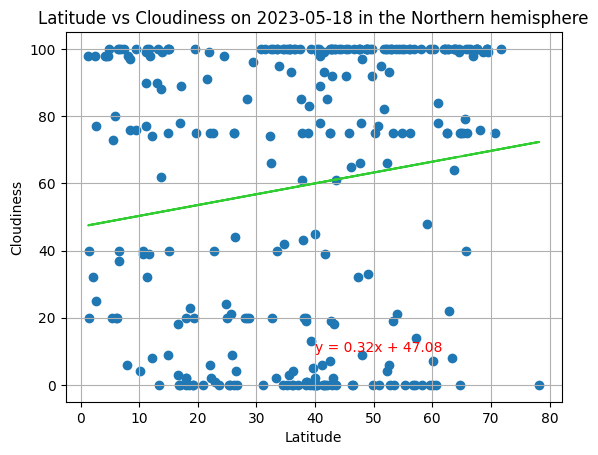

In [75]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Northern')


The correlation coefficient is 0.15


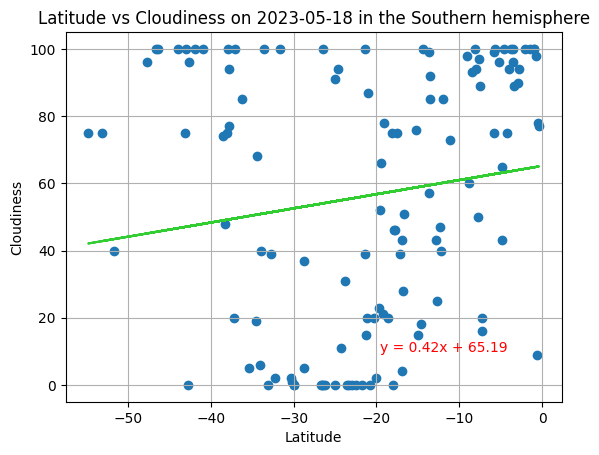

In [76]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Southern')


**Discussion about the linear relationship:** In the Northern Hemisphere, the analysis indicates a very weak correlation coefficient of 0.15 between cloudiness and latitude. This suggests a minimal association between these variables, implying that latitude has limited influence on cloudiness levels in Northern cities.

Similarly, in the Southern Hemisphere, the analysis reveals a correlation coefficient of 0.15, also indicating a very weak relationship between latitude and cloudiness percentage. This finding further reinforces the notion that latitude has a negligible impact on cloudiness levels in Southern cities. The correlation coefficient emphasizes the limited association between these variables, implying that other factors and local conditions play a more significant role in determining cloudiness levels.

These findings underscore that latitude has a minimal effect on cloudiness percentage in cities across both hemispheres. While there is a slight correlation between latitude and cloudiness, it is crucial to note that the correlation is very weak. Consequently, other atmospheric dynamics and regional influences are likely to have a more substantial impact on cloud formation and distribution. When examining and comparing cloudiness patterns between hemispheres and latitudes, it is imperative to consider the limited influence of latitude and account for the complex interplay of various meteorological factors.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient is 0.13


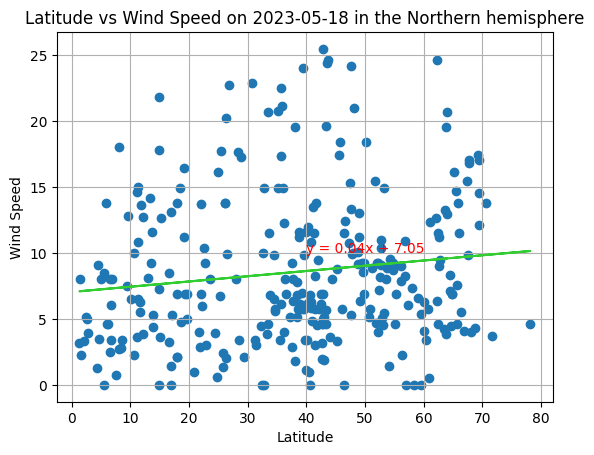

In [77]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Northern')


The correlation coefficient is -0.18


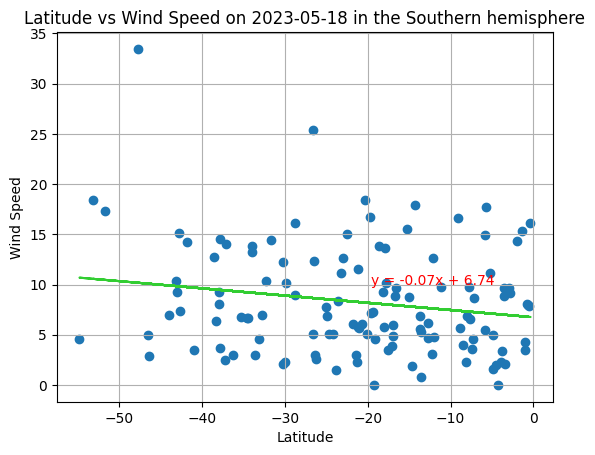

In [78]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Southern')


**Discussion about the linear relationship:** In the Northern Hemisphere, the analysis reveals a very weak positive correlation coefficient of 0.13 between wind speed and latitude. This implies a minimal association between these variables, suggesting that latitude has limited influence on wind speed in Northern cities.

In the Southern Hemisphere, the analysis indicates a very weak negative correlation coefficient of -0.18 between latitude and wind speed. This finding further emphasizes the limited association between these variables, suggesting that latitude has a negligible impact on wind speed in Southern cities. The correlation coefficients for both hemispheres underscore the weak relationship between latitude and wind speed, implying that other factors and local atmospheric conditions play a more substantial role in determining wind patterns.

These findings highlight that latitude has a minimal effect on wind speed in cities across both hemispheres. While a slight correlation between latitude and wind speed exists, it is important to note that the correlation coefficients indicate a weak association. As such, other meteorological factors, such as local topography and pressure systems, are likely to have a more significant influence on wind speed variations. When analyzing and comparing wind speed trends between hemispheres and latitudes, it is crucial to consider the limited impact of latitude and consider the multitude of factors that contribute to wind dynamics.